<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
The idea behind nearest neighbor is to find a predefined number of training samples
closet to the new point and predict the label from them.

The number of samples to be used can be 
1. User Defined
2. Vary Based on Density ( radius based neighbor method )

The Distance of measurement
- Euclidean distance

They are called as non generalizeing machine learning algo because these algos have to 
memorize the training instances.

Being non parametric it is often successful in classification situations where the 
boundary is irregular.


"""

In [0]:
"""
Unsupervised Nearest Neighbors

The choice for neighbor search algorithm is controlled by keyword 'algorithm'
possible values are 
['auto', 'ball_tree', 'kd_tree', 'brute']
"""

In [0]:
"""Finding the nearest neighbor"""

from sklearn.neighbors import NearestNeighbors

import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt



In [0]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

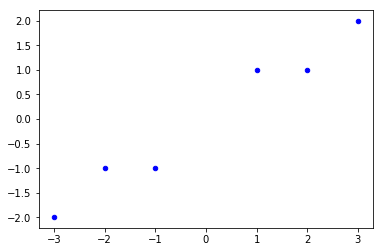

In [0]:
plt.scatter(X[:, 0], X[:, 1], c="b", s=20)

In [0]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm="ball_tree").fit(X)

In [0]:
distances, indices = nbrs.kneighbors(X)

In [0]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [0]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [0]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

In [0]:
"""
Nearest Neighbors Classification

It is a type of instance based learning or non-eneralization it attempts to create 
a general model that stores the instance of training set.

Classification is performed by simply majority voting of the nearest neighbors

KNeighborsClassifier based on k neigbors, the choice of k is data dependent.
A large value of k suppress a noise effect but makes classification boundaries
less distinct.

RadiusNeighborsClassifier based on number of neighbors in a fixed r radius
In case the data is not uniformally distributed RadiusNeighborsClassifier is a 
better choice. In higher dimensions this is ineffective because of 
curse of dimensionality.

It has a parameter "weights" = ["uniform", "distance"]

"""




In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
n_neighbors = 15

In [0]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [0]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

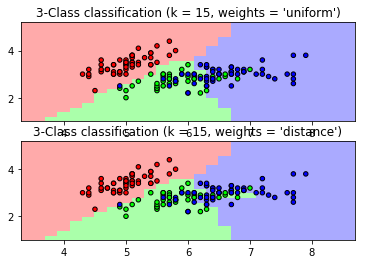

In [19]:
for i, weights in enumerate(['uniform', 'distance']):
  clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
  clf.fit(X, y)
  
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  
  Z = Z.reshape(xx.shape)
  plt.subplot(2, 1, i+1)
  
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

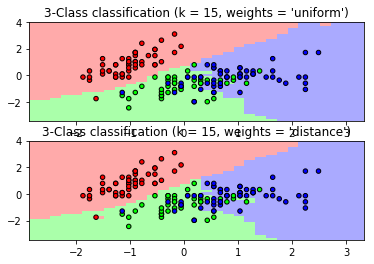

In [24]:
# Effect of Scaling
for i, weights in enumerate(['uniform', 'distance']):
  clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
  X = StandardScaler().fit_transform(X)
  clf.fit(X, y)
  
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  
  Z = Z.reshape(xx.shape)
  plt.subplot(2, 1, i+1)
  
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

Text(0.5, 1.0, 'KNN vs NeighborhoodComponentsAnalysis + KNN')

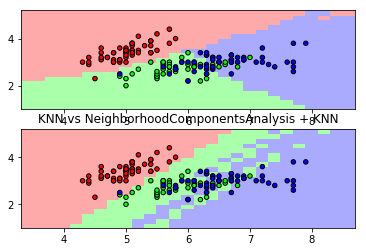

In [57]:
classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', neighbors.KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', neighbors.NeighborhoodComponentsAnalysis()),
                         ('knn', neighbors.KNeighborsClassifier(n_neighbors=n_neighbors))
                         ])
               ]
X = iris.data
X = iris.data[:, :2]

y = iris.target

for i, clf in enumerate(classifiers):
  clf.fit(X, y)
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  
  Z = Z.reshape(xx.shape)
  plt.subplot(2, 1, i+1)
  
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  
plt.title("KNN vs NeighborhoodComponentsAnalysis + KNN")
  

In [0]:
"""
NearestNeighborRegression can be used in case where data labels are continous
rather than discrete variables. 

Two types of regressor

1. KNeighborsRegressor: k nearest neighbors for each query point
2. RadiusNeighborsRegressor implements neighbors with r radius. 


"""

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
np.random.seed(42)

In [0]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

In [0]:
# Add Noise
y[::5] += 1.0 * ( 0.5 - np.random.rand(8) )

In [0]:
n_neighbors = 5 

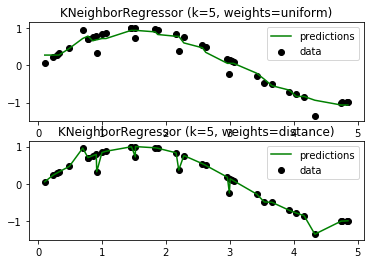

In [0]:
"""
weight=uniform assigns equal weights to all points
weight=distance assigns weight proporational to the inverse of the distance from query point
"""

for i, weights in enumerate(['uniform', 'distance']):
  knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
  y_ = knn.fit(X, y).predict(X)
  
  plt.subplot(2, 1, i+1)
  plt.scatter(X, y, c='k', label='data')
  plt.plot(X, y_, c='g', label='predictions')
  plt.axis("tight")
  plt.legend()
  plt.title("KNeighborRegressor (k={0}, weights={1})".format(n_neighbors, weights))

In [0]:
"""
 Nearest Neighbor Algorithms We have 3 choice
 1. Brute Force
 2. K-D Tree
 3. Ball Tree
"""

In [0]:
"""
Neighbor Component Analysis as Dimensionality Reduction
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.datasets import load_digits

In [0]:
digits = load_digits()
X = digits.data
y = digits.target

n_samples, n_features = X.shape
n_neighbors = 30

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

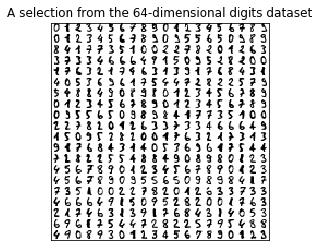

In [62]:
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

In [0]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


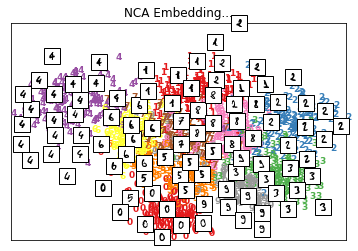

In [66]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)
X_nca = nca.fit_transform(X, y)
plot_embedding(X_nca, "NCA Embedding...")